In [1]:
import os,shutil

In [2]:
dataset_dir='/home/dataset/training_set'
user_dir='/home/jk12904613/catsanddogs'

In [15]:
train_dir=os.path.join(user_dir,'train')
# os.mkdir(train_dir)

validation_dir=os.path.join(user_dir,'validation')
# os.mkdir(validation_dir)

test_dir=os.path.join(user_dir,'test')
# os.mkdir(test_dir)


In [16]:
train_cats_dir=os.path.join(train_dir,'cats')
# os.mkdir(train_cats_dir)

train_dogs_dir=os.path.join(train_dir,'dogs')
# os.mkdir(train_dogs_dir)

validation_cats_dir=os.path.join(validation_dir,'cats')
# os.mkdir(validation_cats_dir)

validation_dogs_dir=os.path.join(validation_dir,'dogs')
# os.mkdir(validation_dogs_dir)

test_cats_dir=os.path.join(test_dir,'cats')
# os.mkdir(test_cats_dir)

test_dogs_dir=os.path.join(test_dir,'dogs')
# os.mkdir(test_dogs_dir)

In [6]:
# fnames=['cat.{}.jpg'.format(i) for i in range(1,1001)]
# for fname in fnames:
#     src=os.path.join(dataset_dir,'cats',fname)
#     dst=os.path.join(train_cats_dir,fname)
#     shutil.copyfile(src,dst)
# fnames=['cat.{}.jpg'.format(i) for i in range(1001,1301)]
# for fname in fnames:
#     src=os.path.join(dataset_dir,'cats',fname)
#     dst=os.path.join(validation_cats_dir,fname)
#     shutil.copyfile(src,dst)
# fnames=['cat.{}.jpg'.format(i) for i in range(1500,1800)]
# for fname in fnames:
#     src=os.path.join(dataset_dir,'cats',fname)
#     dst=os.path.join(test_cats_dir,fname)
#     shutil.copyfile(src,dst)

In [7]:
# fnames=['dog.{}.jpg'.format(i) for i in range(1,1001)]
# for fname in fnames:
#     src=os.path.join(dataset_dir,'dogs',fname)
#     dst=os.path.join(train_dogs_dir,fname)
#     shutil.copyfile(src,dst)
# fnames=['dog.{}.jpg'.format(i) for i in range(1001,1301)]
# for fname in fnames:
#     src=os.path.join(dataset_dir,'dogs',fname)
#     dst=os.path.join(validation_dogs_dir,fname)
#     shutil.copyfile(src,dst)
# fnames=['dog.{}.jpg'.format(i) for i in range(1500,1800)]
# for fname in fnames:
#     src=os.path.join(dataset_dir,'dogs',fname)
#     dst=os.path.join(test_dogs_dir,fname)
#     shutil.copyfile(src,dst)

In [17]:
print('total training cat images',len(os.listdir(train_cats_dir)))
print('total training dog images',len(os.listdir(train_dogs_dir)))
print('total validation cat images',len(os.listdir(validation_cats_dir)))
print('total validation dog images',len(os.listdir(validation_dogs_dir)))
print('total test dog images',len(os.listdir(test_cats_dir)))
print('total test cat images',len(os.listdir(test_dogs_dir)))

total training cat images 1000
total training dog images 1000
total validation cat images 300
total validation dog images 300
total test dog images 300
total test cat images 300


## Model Building

In [25]:
from keras import layers
from keras import models
from keras import optimizers

from keras.preprocessing.image import ImageDataGenerator

In [26]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(128,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
__________

In [27]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [28]:
train_datagen=ImageDataGenerator(rescale=1./255)
validation_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_dir,target_size=(64,64),batch_size=20,class_mode='binary')
validation_generator=validation_datagen.flow_from_directory(validation_dir,target_size=(64,64),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [29]:
for data_batch,labels_batch in train_generator:
    print('data batch shape: ',data_batch.shape)
    print('labels batch shape: ',labels_batch.shape)
    break

data batch shape:  (20, 64, 64, 3)
labels batch shape:  (20,)


In [30]:
for data_batch,labels_batch in train_generator:
    print('data batch : ',data_batch)
    print('labels batch : ',labels_batch)
    break

data batch :  [[[[0.56078434 0.59607846 0.58431375]
   [0.5882353  0.62352943 0.6117647 ]
   [0.5254902  0.56078434 0.54901963]
   ...
   [0.21176472 0.37647063 0.43921572]
   [0.30588236 0.5058824  0.6117647 ]
   [0.34901962 0.52156866 0.6745098 ]]

  [[0.01568628 0.00784314 0.01176471]
   [0.02352941 0.01568628 0.01960784]
   [0.07843138 0.07058824 0.07450981]
   ...
   [0.19607845 0.36078432 0.42352945]
   [0.29411766 0.49411768 0.6       ]
   [0.35686275 0.5137255  0.654902  ]]

  [[0.01568628 0.02352941 0.01960784]
   [0.02352941 0.03137255 0.02745098]
   [0.02745098 0.03529412 0.03137255]
   ...
   [0.2392157  0.4039216  0.4666667 ]
   [0.30980393 0.50980395 0.6156863 ]
   [0.3647059  0.5176471  0.64705884]]

  ...

  [[0.4901961  0.45098042 0.3137255 ]
   [0.45882356 0.41176474 0.31764707]
   [0.43137258 0.3803922  0.31764707]
   ...
   [0.3647059  0.31764707 0.25490198]
   [0.4156863  0.37254903 0.28627452]
   [0.48235297 0.43529415 0.34901962]]

  [[0.47450984 0.42352945 0.349

In [31]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=10,validation_data=validation_generator,validation_steps=50)

Epoch 1/10
100/100 [==============================] - 10s 100ms/step - loss: 0.7002 - acc: 0.5050 - val_loss: 0.6903 - val_acc: 0.5717
Epoch 2/10
100/100 [==============================] - 10s 97ms/step - loss: 0.6885 - acc: 0.5485 - val_loss: 0.6600 - val_acc: 0.5833
Epoch 3/10
100/100 [==============================] - 9s 94ms/step - loss: 0.6466 - acc: 0.6290 - val_loss: 0.6211 - val_acc: 0.6617
Epoch 4/10
100/100 [==============================] - 9s 88ms/step - loss: 0.5991 - acc: 0.6845 - val_loss: 0.6727 - val_acc: 0.6217
Epoch 5/10
100/100 [==============================] - 9s 90ms/step - loss: 0.5670 - acc: 0.7180 - val_loss: 0.5971 - val_acc: 0.6950
Epoch 6/10
100/100 [==============================] - 9s 89ms/step - loss: 0.5395 - acc: 0.7355 - val_loss: 0.5995 - val_acc: 0.6633
Epoch 7/10
100/100 [==============================] - 9s 94ms/step - loss: 0.4935 - acc: 0.7580 - val_loss: 0.5922 - val_acc: 0.7183
Epoch 8/10
100/100 [==============================] - 10s 99ms/ste

In [32]:
model.save('cats_and_dogs_small_1.h5')

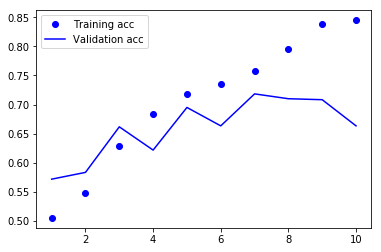

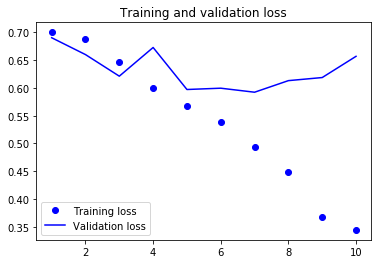

In [34]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.legend()
plt.figure()
plt.plot(epochs, loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [35]:
datagen=ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

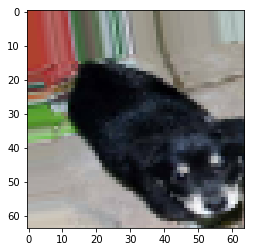

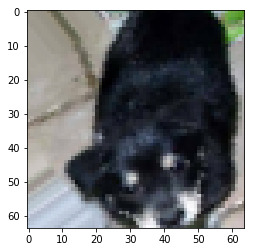

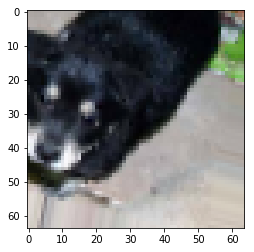

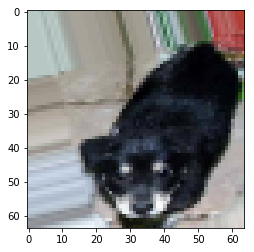

In [38]:
from keras.preprocessing import image
fnames=[os.path.join(train_dogs_dir,fname) for fname in os.listdir(train_dogs_dir)]

img_path=fnames[200]
img=image.load_img(img_path,target_size=(64,64))
x=image.img_to_array(img)
x=x.reshape((1,)+x.shape)

i=0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%4==0:
        break
plt.show()

In [39]:
model2=models.Sequential()
model2.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model2.add(layers.MaxPooling2D(2,2))
model2.add(layers.Conv2D(64,(3,3),activation='relu'))
model2.add(layers.MaxPooling2D(2,2))
model2.add(layers.Conv2D(128,(3,3),activation='relu'))
model2.add(layers.MaxPooling2D(2,2))
# model2.add(layers.Conv2D(128,(3,3),activation='relu'))
# model2.add(layers.MaxPooling2D(2,2))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(512,activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [40]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen=ImageDataGenerator(rescale=.1/255)

train_generator=train_datagen.flow_from_directory(train_dir,target_size=(64,64),batch_size=32,class_mode='binary')
validation_generator=validation_datagen.flow_from_directory(validation_dir,target_size=(64,64),batch_size=32,class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [41]:
history2=model2.fit_generator(train_generator,steps_per_epoch=100,epochs=10,validation_data=validation_generator,validation_steps=50)

Epoch 1/10
100/100 [==============================] - 15s 146ms/step - loss: 0.6973 - acc: 0.5006 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 2/10
100/100 [==============================] - 14s 141ms/step - loss: 0.6746 - acc: 0.5919 - val_loss: 1.1216 - val_acc: 0.5000
Epoch 3/10
100/100 [==============================] - 15s 149ms/step - loss: 0.6403 - acc: 0.6300 - val_loss: 0.9726 - val_acc: 0.5000
Epoch 4/10
100/100 [==============================] - 17s 166ms/step - loss: 0.6106 - acc: 0.6687 - val_loss: 0.8803 - val_acc: 0.5000
Epoch 5/10
100/100 [==============================] - 14s 139ms/step - loss: 0.6005 - acc: 0.6800 - val_loss: 1.1263 - val_acc: 0.5000
Epoch 6/10
100/100 [==============================] - 15s 147ms/step - loss: 0.5911 - acc: 0.6875 - val_loss: 1.5040 - val_acc: 0.5000
Epoch 7/10
100/100 [==============================] - 15s 145ms/step - loss: 0.5549 - acc: 0.7200 - val_loss: 1.4325 - val_acc: 0.5000
Epoch 8/10
100/100 [==============================] - 1

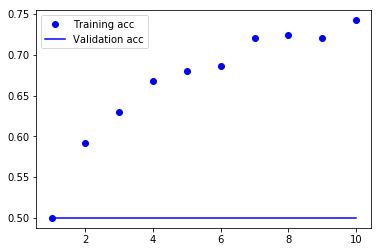

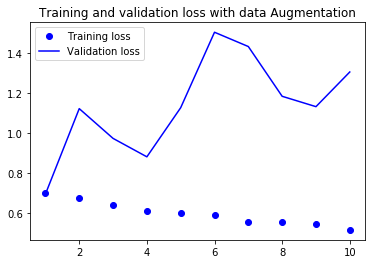

In [42]:
acc=history2.history['acc']
val_acc=history2.history['val_acc']
loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.legend()
plt.figure()
plt.plot(epochs, loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss with data Augmentation')
plt.legend()
plt.show()

In [ ]:
model2.save('cats_and_dogs_small_2.h5')